# 下準備

In [ ]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

**日本語を表示するための準備**

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 123597 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipafont-mincho.
Preparing to unpack .../fonts-ipafont-mincho_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-mincho (00303-21ubuntu1) ...
Setting up fonts-ipafont-mincho (00303-21ubuntu1) ...
update-alternatives: using /usr/share/fonts/opentype/ipafont-mincho/ipam.ttf to provide /usr/share/fonts/truetype/fonts-japanese-mincho.ttf (fonts-japanese-mincho.ttf) in auto mode
Setting up fonts-ipafont-gothic (00303-21ubuntu1) ...
update-alternatives: using /usr/share/fonts/opentype/ipafont-gothic/ipag.

Text(0.5, 1.0, '日本語を表示できるかテスト')

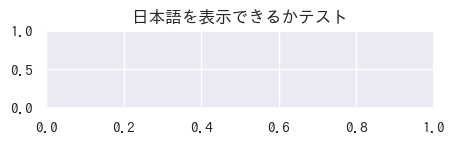

In [ ]:
!apt-get update -qq
!apt-get install fonts-ipafont-gothic -qq

from matplotlib import font_manager

# インストールしたフォントのパスを取得
font_path = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'

# フォントを Matplotlib に追加
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'IPAGothic'

sns.set(font='IPAGothic')

# 動作確認
plt.figure(figsize=(5,1))
plt.title('日本語を表示できるかテスト')

**データ読込**

*「基礎的なコード集」で作成したデータセットを用います*

In [ ]:
# Googleドライブをマウント
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Excelファイルを読み込み、データフレームに格納
df = pd.read_csv("/content/drive/MyDrive/カスタムデータセット/data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   能力評価      5000 non-null   float64
 1   性格診断結果    5000 non-null   int64  
 2   思索型:内閉性   5000 non-null   float64
 3   自制型:弱気さ   5000 non-null   float64
 4   従順性       5000 non-null   float64
 5   ﾓﾗﾄﾘｱﾑ傾向  5000 non-null   float64
 6   自己信頼性     5000 non-null   float64
 7   努力型:持続性   5000 non-null   float64
 8   積極性       5000 non-null   float64
 9   協調性       5000 non-null   float64
 10  共感性       5000 non-null   float64
 11  努力型:規則性   5000 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 468.9 KB


In [ ]:
df.head(10)

,能力評価,性格診断結果,思索型:内閉性,自制型:弱気さ,従順性,ﾓﾗﾄﾘｱﾑ傾向,自己信頼性,努力型:持続性,積極性,協調性,共感性,努力型:規則性
0,3.000,4,49.7355,54.83225,50.00000,30.0000,54.000,51.00000,52.00000,44.8645,52.0000,55.0000
1,3.224,0,48.0000,38.00000,55.00000,41.0000,34.000,40.00000,63.00000,53.0000,26.0000,53.8765
2,3.000,4,49.7355,54.83225,45.00000,51.0000,39.000,39.53575,61.00000,74.0000,57.0000,62.0000
3,3.000,6,64.0000,54.83225,32.00000,54.0000,36.000,69.00000,48.00000,44.0000,31.5885,46.0000
4,3.224,0,72.0000,62.00000,42.00000,43.7975,42.000,21.00000,50.13425,61.0000,21.0000,53.8765
5,3.224,2,50.0000,62.00000,24.00000,53.0000,38.418,51.00000,74.00000,71.0000,59.0000,51.0000
6,4.000,1,44.0000,37.00000,44.02225,44.0000,38.418,39.53575,65.00000,41.0000,20.0000,44.0000
7,4.000,6,49.0000,74.00000,44.02225,33.0000,38.000,59.00000,50.13425,47.0000,31.5885,35.0000
8,3.000,0,49.7355,54.83225,53.00000,42.0000,33.000,54.00000,38.00000,14.0000,31.5885,61.0000
9,3.000,5,49.7355,54.83225,39.00000,54.0000,38.418,50.00000,57.00000,44.8645,12.0000,53.8765


# 決定木モデルの作成（分類モデル）

In [ ]:
# 必要なライブラリをインストール
!pip install graphviz
!pip install pydotplus
!pip install dtreeviz

In [ ]:
# 必要なライブラリをインポート
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor

import pydotplus
from IPython.display import Image

In [ ]:
# 特徴量とターゲットに分ける
X = df.drop('能力評価', axis=1)
y = df['能力評価']

# トレーニングセットとテストセットに分割
# 訓練用データを元データの8割、テスト評価用のデータを元データの2割に設定して分割します。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

**設計者が決めるパラメータの最適解を求めるために、「ハイパーパラメータ探索」を行う**

ハイパーパラメータ探索には「グリッドサーチ」「ランダムサーチ」「ベイズ最適化」などの方法が挙げられますが、今回は全ての範囲をしらみつぶしで探索する「グリッドサーチ」を用います

In [ ]:
# パラメータグリッドの設定
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 4, 6, 8, 10, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]
}

# モデルのインスタンス化
model = DecisionTreeRegressor()

# グリッドサーチの設定
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# グリッドサーチの実行
grid_search.fit(X_train, y_train)

# 最適なパラメータの表示
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
Best parameters found:  {'criterion': 'friedman_mse', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 10, 'splitter': 'random'}
Best score:  -0.14002266041489037


**最適なパラメーターがわかったので、これを用いて決定木モデルを構築します**

In [ ]:
# 最適なパラメータでモデルの作成
best_model = grid_search.best_estimator_

# トレーニングデータに対するモデルの適合
best_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3, min_samples_leaf=8,
                      min_samples_split=10, splitter='random')

**構築したモデルと先ほど分割したテスト評価用データを用いて、モデルの評価を行います**

In [ ]:
# 予測
y_pred = best_model.predict(X_test)

# 評価
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.1214636094690844
Root Mean Squared Error (RMSE): 0.34851629727902883
Mean Absolute Error (MAE): 0.25565924155360314


**構築した決定木を可視化します**

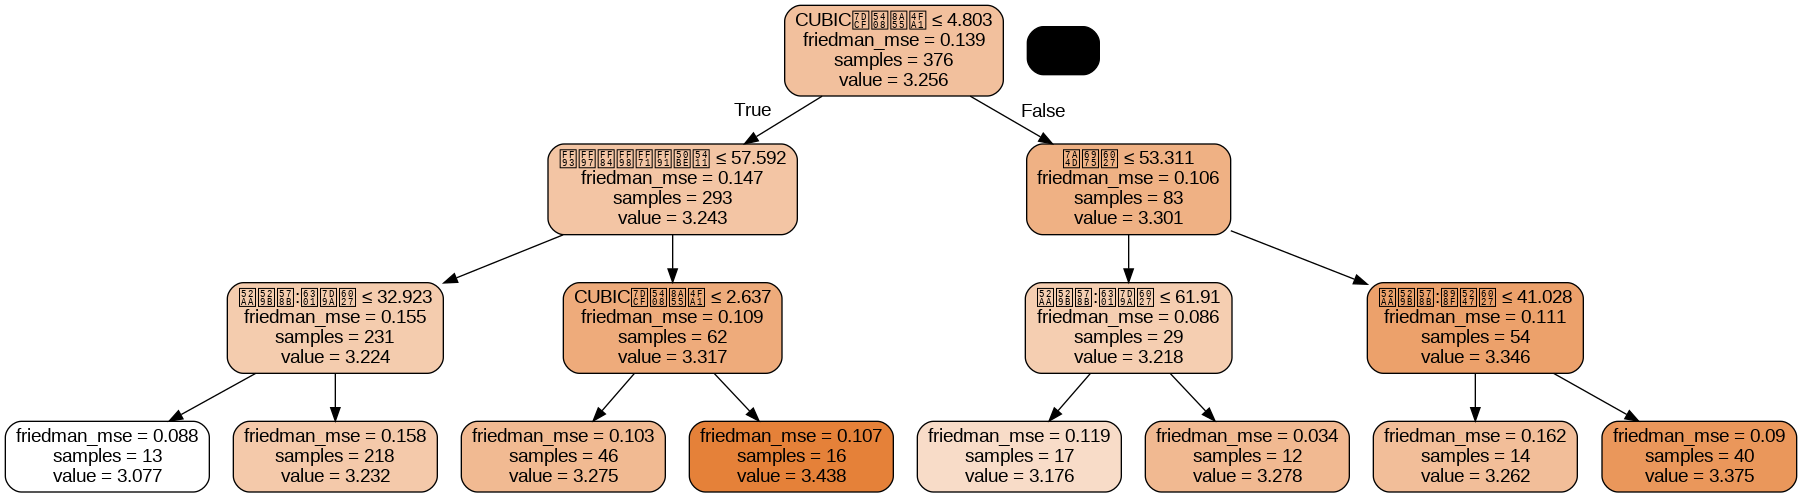

In [ ]:
# 決定木をエクスポート
dot_data = export_graphviz(
    best_model,  # グリッドサーチ後の最適なモデルを使用
    out_file=None,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

# グラフを生成
graph = pydotplus.graph_from_dot_data(dot_data)

# グラフを表示
Image(graph.create_png())

**訓練時のデータに過剰に適合してしまうことを過学習といい、これを検知するために訓練時とテスト時のMSE（評価指標）を比較します。**

**この値の差が大きいと過学習の可能性があります**

In [ ]:
# トレーニングデータに対する予測
train_pred = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)

# テストデータに対する予測
test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')

Training MSE: 0.13445785566490281
Testing MSE: 0.12162583331831095


**構築した機械学習モデルを保存します**

**これにより、他のプログラムでこの機械学習モデルを用いることができます。**

In [ ]:
import joblib

# 決定木をエクスポート
joblib.dump(best_model, 'best_model.pkl')


# 保存したモデルを読み込む
# loaded_tree = joblib.load('best_decision_tree_model.pkl')

"\n# モデルをインポート\nimport joblib\n\n# 保存したモデルを読み込む\nloaded_tree = joblib.load('best_decision_tree_model.pkl')\n"